
## Projet DataScientist : Analyse des tirs de joueurs NBA

Pour aller un plus loin, nous nous sommes intéressés à un second dataset que nous avions à disposition. Ce dataset s’intéressait à différentes statistiques des joueurs au cours de chaque année. 

Jeu de données : "Seasons_Stats.csv"

## Importation des données :

Chargement des libraries nécessaires à l'exploitation des données :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from scipy.stats import pearsonr
import itertools
import statsmodels.api

# Permet d'ignorer les messages d'erreur.
import warnings
warnings.filterwarnings('ignore' )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


seasons_stat = pd.read_csv('Seasons_Stats.csv', index_col = 'Unnamed: 0')

In [2]:
seasons_stat.tail(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24681,2017.0,Delon Wright,PG,24.0,TOR,27.0,0.0,446.0,15.0,0.535,...,0.764,16.0,32.0,48.0,57.0,27.0,11.0,25.0,31.0,150.0
24682,2017.0,James Young,SG,21.0,BOS,29.0,0.0,220.0,10.0,0.549,...,0.667,6.0,20.0,26.0,4.0,10.0,2.0,4.0,15.0,68.0
24683,2017.0,Joe Young,PG,24.0,IND,33.0,0.0,135.0,11.4,0.433,...,0.733,1.0,16.0,17.0,15.0,4.0,0.0,5.0,5.0,68.0
24684,2017.0,Nick Young,SG,31.0,LAL,60.0,60.0,1556.0,14.1,0.588,...,0.856,25.0,112.0,137.0,58.0,37.0,14.0,36.0,137.0,791.0
24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,0.562,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


Informations sur les données :

In [3]:
seasons_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

Tri des données pour se restreindre aux 20 joueurs considérés :

In [4]:
seasons_stat = seasons_stat[seasons_stat['Player'].isin(['LeBron James','Kobe Bryant','Tim Duncan', "Shaquille O'Neal*", 'Stephen Curry', 'Kevin Durant','Dwyane Wade','Giannis Antetokounmpo','Kevin Garnett','Dirk Nowitzki','Kawhi Leonard','Allen Iverson*','Steve Nash','Nikola Jokic', 'Chris Paul','Paul Pierce', 'Dwight Howard', 'Jason Kidd', 'Ray Allen', 'James Harden'])]
seasons_stat.tail(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24239,2017.0,Kevin Durant,SF,28.0,GSW,62.0,62.0,2070.0,27.6,0.651,...,0.875,39.0,474.0,513.0,300.0,66.0,99.0,138.0,117.0,1555.0
24306,2017.0,James Harden,PG,27.0,HOU,81.0,81.0,2947.0,27.3,0.613,...,0.847,95.0,564.0,659.0,906.0,120.0,37.0,464.0,215.0,2356.0
24345,2017.0,Dwight Howard,C,31.0,ATL,74.0,74.0,2199.0,20.8,0.627,...,0.533,296.0,644.0,940.0,104.0,64.0,92.0,170.0,203.0,1002.0
24365,2017.0,LeBron James,SF,32.0,CLE,74.0,74.0,2794.0,27.0,0.619,...,0.674,97.0,543.0,640.0,646.0,92.0,44.0,303.0,134.0,1954.0
24380,2017.0,Nikola Jokic,C,21.0,DEN,73.0,59.0,2038.0,26.4,0.640,...,0.825,212.0,506.0,718.0,359.0,61.0,56.0,171.0,214.0,1221.0
24414,2017.0,Kawhi Leonard,SF,25.0,SAS,74.0,74.0,2474.0,27.5,0.611,...,0.880,80.0,350.0,430.0,260.0,132.0,55.0,154.0,122.0,1888.0
24499,2017.0,Dirk Nowitzki,PF,38.0,DAL,54.0,54.0,1424.0,17.0,0.529,...,0.875,23.0,330.0,353.0,82.0,30.0,38.0,51.0,113.0,769.0
24522,2017.0,Chris Paul,PG,31.0,LAC,61.0,61.0,1921.0,26.2,0.614,...,0.892,41.0,263.0,304.0,563.0,118.0,8.0,147.0,146.0,1104.0
24529,2017.0,Paul Pierce,SF,39.0,LAC,25.0,7.0,277.0,5.7,0.535,...,0.769,1.0,47.0,48.0,10.0,4.0,5.0,16.0,40.0,81.0
24643,2017.0,Dwyane Wade,SG,35.0,CHI,60.0,59.0,1792.0,18.5,0.508,...,0.794,64.0,207.0,271.0,229.0,86.0,41.0,138.0,112.0,1096.0


In [5]:
seasons_stat[seasons_stat['Player'] == "Shaquille O'Neal*"]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
11187,1993.0,Shaquille O'Neal*,C,20.0,ORL,81.0,81.0,3071.0,22.9,0.584,...,0.592,342.0,780.0,1122.0,152.0,60.0,286.0,307.0,321.0,1893.0
11685,1994.0,Shaquille O'Neal*,C,21.0,ORL,81.0,81.0,3224.0,28.5,0.605,...,0.554,384.0,688.0,1072.0,195.0,76.0,231.0,222.0,281.0,2377.0
12136,1995.0,Shaquille O'Neal*,C,22.0,ORL,79.0,79.0,2923.0,28.6,0.588,...,0.533,328.0,573.0,901.0,214.0,73.0,192.0,204.0,258.0,2315.0
12633,1996.0,Shaquille O'Neal*,C,23.0,ORL,54.0,52.0,1946.0,26.4,0.570,...,0.487,182.0,414.0,596.0,155.0,34.0,115.0,155.0,193.0,1434.0
13220,1997.0,Shaquille O'Neal*,C,24.0,LAL,51.0,51.0,1941.0,27.1,0.556,...,0.484,195.0,445.0,640.0,159.0,46.0,147.0,146.0,180.0,1336.0
13743,1998.0,Shaquille O'Neal*,C,25.0,LAL,60.0,57.0,2175.0,28.8,0.587,...,0.527,208.0,473.0,681.0,142.0,39.0,144.0,175.0,193.0,1699.0
14292,1999.0,Shaquille O'Neal*,C,26.0,LAL,49.0,49.0,1705.0,30.6,0.584,...,0.540,187.0,338.0,525.0,114.0,36.0,82.0,122.0,155.0,1289.0
14806,2000.0,Shaquille O'Neal*,C,27.0,LAL,79.0,79.0,3163.0,30.6,0.578,...,0.524,336.0,742.0,1078.0,299.0,36.0,239.0,223.0,255.0,2344.0
15330,2001.0,Shaquille O'Neal*,C,28.0,LAL,74.0,74.0,2924.0,30.2,0.574,...,0.513,291.0,649.0,940.0,277.0,47.0,204.0,218.0,256.0,2125.0
15841,2002.0,Shaquille O'Neal*,C,29.0,LAL,67.0,66.0,2422.0,29.7,0.590,...,0.555,235.0,480.0,715.0,200.0,41.0,137.0,171.0,199.0,1822.0


En faisant apparaître les modalités de la variable Player, on remarque que les joueurs n'ont pas le même nombre de données disponibles. Cela constitue une première limite pour notre jeu de donnée.

In [6]:
fig = px.histogram(seasons_stat, y="Player", title = "Modalités de la variable Player :", histnorm='percent')
fig.update_yaxes(categoryorder = "total ascending",showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

## Preprocessing : 

Vérification de la présence de doublons :

In [7]:
seasons_stat.duplicated().sum()

0

Vérification de la présence de données manquantes :

In [8]:
seasons_stat.isnull().sum()

Year        0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
PER         0
TS%         0
3PAr        0
FTr         0
ORB%        0
DRB%        0
TRB%        0
AST%        0
STL%        0
BLK%        0
TOV%        0
USG%        0
blanl     293
OWS         0
DWS         0
WS          0
WS/48       0
blank2    293
OBPM        0
DBPM        0
BPM         0
VORP        0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%        10
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [9]:
seasons_stat[seasons_stat['3P%'].isnull()][['Player','3P','3P%']]

,Player,3P,3P%
13743,Shaquille O'Neal*,0.0,NaN
16324,Shaquille O'Neal*,0.0,NaN
16874,Shaquille O'Neal*,0.0,NaN
17462,Shaquille O'Neal*,0.0,NaN
18030,Shaquille O'Neal*,0.0,NaN
18572,Shaquille O'Neal*,0.0,NaN
19145,Shaquille O'Neal*,0.0,NaN
19146,Shaquille O'Neal*,0.0,NaN
19147,Shaquille O'Neal*,0.0,NaN
20931,Shaquille O'Neal*,0.0,NaN


In [10]:
seasons_stat[['3P','3PA','3P%','3PAr']].head(10)

,3P,3PA,3P%,3PAr
11187,0.0,2.0,0.000,0.002
11685,0.0,2.0,0.000,0.001
12054,70.0,257.0,0.272,0.300
12136,0.0,5.0,0.000,0.003
12448,8.0,28.0,0.286,0.038
12536,133.0,396.0,0.336,0.306
12633,1.0,2.0,0.500,0.002
12846,117.0,298.0,0.393,0.328
12900,51.0,136.0,0.375,0.322
13012,6.0,21.0,0.286,0.019


In [11]:
print('Erreur totale')
print('3P :',abs((seasons_stat['3P']/seasons_stat['3PA']-seasons_stat['3P%']).round(3)).sum())
print('2P :',abs((seasons_stat['2P']/seasons_stat['2PA']-seasons_stat['2P%']).round(3)).sum())
print('FT :',abs((seasons_stat['FT']/seasons_stat['FTA']-seasons_stat['FT%']).round(3)).sum())
print('FG :',abs((seasons_stat['FG']/seasons_stat['FGA']-seasons_stat['FG%']).round(3)).sum())

Erreur totale
3P : 0.002
2P : 0.0
FT : 0.002
FG : 0.0


Supression des variables inutiles :

In [12]:
# Suppression des variables inutiles
seasons_stat = seasons_stat.drop(['blanl','blank2',], axis = 1)
seasons_stat = seasons_stat.drop(['PER','ORB','DRB','TRB','ORB%','DRB%','TRB%',
                                  'BLK','BLK%','TOV','TOV%','AST','AST%','STL',
                                  'STL%','WS','WS/48','OWS','DWS','USG%','BPM',
                                  'OBPM','DBPM','VORP','PF'], axis = 1)
# Suppression des dernières variables inutiles
seasons_stat = seasons_stat.drop(['3PAr','FTr',], axis = 1)

Modifications supplémentaires sur le jeu de donnée :

In [13]:
# Réindexation des entrées
seasons_stat.reset_index(drop=True,inplace=True)

In [14]:
# Réarrangement des colonnes
seasons_stat = seasons_stat[['Player','Year','Tm','Pos','Age',
                            'G','GS','MP','3P','3PA','3P%',
                            '2P','2PA','2P%','FT','FTA','FT%',
                            'FG','FGA','FG%','TS%','eFG%','PTS']]

# Modification de la colonne 'Year' pour ne garder que les 4 premiers éléments
seasons_stat['Year'] = seasons_stat['Year'].astype(str).str[:4]
seasons_stat['Year'] = seasons_stat['Year'].astype(int)

# Modification de la colonne 'Age' pour ne garder que les 2 premiers éléments
seasons_stat['Age'] = seasons_stat['Age'].astype(str).str[:2]
seasons_stat['Age'] = seasons_stat['Age'].astype(int)

# Modification des colonnes dont les modalités sont des entiers
seasons_stat[['G','GS','MP','3P','3PA','2P','2PA','FT','FTA','FG','FGA',
              'PTS']] = seasons_stat[['G','GS','MP','3P','3PA',
              '2P','2PA','FT','FTA','FG','FGA','PTS']].astype('int64')

seasons_stat.head()

,Player,Year,Tm,Pos,Age,G,GS,MP,3P,3PA,...,2P%,FT,FTA,FT%,FG,FGA,FG%,TS%,eFG%,PTS
0,Shaquille O'Neal*,1993,ORL,C,20,81,81,3071,0,2,...,0.563,427,721,0.592,733,1304,0.562,0.584,0.562,1893
1,Shaquille O'Neal*,1994,ORL,C,21,81,81,3224,0,2,...,0.600,471,850,0.554,953,1591,0.599,0.605,0.599,2377
2,Jason Kidd,1995,DAL,PG,21,79,79,2668,70,257,...,0.433,192,275,0.698,330,857,0.385,0.471,0.426,922
3,Shaquille O'Neal*,1995,ORL,C,22,79,79,2923,0,5,...,0.585,455,854,0.533,930,1594,0.583,0.588,0.583,2315
4,Kevin Garnett,1996,MIN,SF,19,80,43,2293,8,28,...,0.499,105,149,0.705,361,735,0.491,0.522,0.497,835


In [16]:
#Suppression des lignes avec le total lorsque le joueur a changé d'équipe en cours de saison
seasons_stat=seasons_stat.drop(seasons_stat[seasons_stat['Tm']=='TOT'].index)
seasons_stat.head(15)

,Player,Year,Tm,Pos,Age,G,GS,MP,3P,3PA,...,2P%,FT,FTA,FT%,FG,FGA,FG%,TS%,eFG%,PTS
0,Shaquille O'Neal*,1993,ORL,C,20,81,81,3071,0,2,...,0.563,427,721,0.592,733,1304,0.562,0.584,0.562,1893
1,Shaquille O'Neal*,1994,ORL,C,21,81,81,3224,0,2,...,0.600,471,850,0.554,953,1591,0.599,0.605,0.599,2377
2,Jason Kidd,1995,DAL,PG,21,79,79,2668,70,257,...,0.433,192,275,0.698,330,857,0.385,0.471,0.426,922
3,Shaquille O'Neal*,1995,ORL,C,22,79,79,2923,0,5,...,0.585,455,854,0.533,930,1594,0.583,0.588,0.583,2315
4,Kevin Garnett,1996,MIN,SF,19,80,43,2293,8,28,...,0.499,105,149,0.705,361,735,0.491,0.522,0.497,835
5,Jason Kidd,1996,DAL,PG,22,81,81,3034,133,396,...,0.401,229,331,0.692,493,1293,0.381,0.468,0.433,1348
6,Shaquille O'Neal*,1996,ORL,C,23,54,52,1946,1,2,...,0.573,249,511,0.487,592,1033,0.573,0.570,0.574,1434
7,Ray Allen,1997,MIL,SG,21,82,81,2532,117,298,...,0.448,205,249,0.823,390,908,0.430,0.541,0.494,1102
8,Kobe Bryant,1997,LAL,SG,18,71,6,1103,51,136,...,0.437,136,166,0.819,176,422,0.417,0.544,0.477,539
9,Kevin Garnett,1997,MIN,SF,20,77,77,2995,6,21,...,0.503,205,272,0.754,549,1100,0.499,0.537,0.502,1309


In [17]:
seasons_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 292
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  285 non-null    object 
 1   Year    285 non-null    int32  
 2   Tm      285 non-null    object 
 3   Pos     285 non-null    object 
 4   Age     285 non-null    int32  
 5   G       285 non-null    int64  
 6   GS      285 non-null    int64  
 7   MP      285 non-null    int64  
 8   3P      285 non-null    int64  
 9   3PA     285 non-null    int64  
 10  3P%     276 non-null    float64
 11  2P      285 non-null    int64  
 12  2PA     285 non-null    int64  
 13  2P%     285 non-null    float64
 14  FT      285 non-null    int64  
 15  FTA     285 non-null    int64  
 16  FT%     285 non-null    float64
 17  FG      285 non-null    int64  
 18  FGA     285 non-null    int64  
 19  FG%     285 non-null    float64
 20  TS%     285 non-null    float64
 21  eFG%    285 non-null    float64
 22  PT

# Exploration des variables quantitatives et qualitatives et preprocessing nécessaire :

# Analyse et étude des relations entre les variables quantitatives :

Description statistique :

In [24]:
display(seasons_stat[['G','GS','MP','3P','3PA','3P%',
              '2P','2PA','2P%']].describe().round(1))
display(seasons_stat[['FT','FTA','FT%','FG','FGA','FG%',
              'TS%','eFG%','PTS']].describe().round(1))

,G,GS,MP,3P,3PA,3P%,2P,2PA,2P%
count,285.0,285.0,285.0,285.0,285.0,276.0,285.0,285.0,285.0
mean,68.4,64.8,2401.6,76.6,208.3,0.3,422.9,833.2,0.5
std,16.4,20.8,727.8,68.8,173.4,0.1,199.2,381.4,0.1
min,3.0,0.0,67.0,0.0,0.0,0.0,13.0,25.0,0.4
25%,62.0,56.0,1971.0,8.0,28.0,0.3,293.0,594.0,0.5
50%,75.0,74.0,2578.0,72.0,209.0,0.3,416.0,822.0,0.5
75%,80.0,80.0,2979.0,120.0,329.0,0.4,578.0,1122.0,0.5
max,82.0,82.0,3485.0,402.0,886.0,1.0,956.0,1664.0,0.7


,FT,FTA,FT%,FG,FGA,FG%,TS%,eFG%,PTS
count,285.0,285.0,285.0,285.0,285.0,285.0,285.0,285.0,285.0
mean,316.2,412.1,0.8,499.6,1041.4,0.5,0.6,0.5,1392.0
std,171.6,228.3,0.1,206.8,425.2,0.1,0.0,0.0,591.2
min,2.0,4.0,0.4,15.0,26.0,0.4,0.5,0.4,37.0
25%,193.0,240.0,0.7,369.0,785.0,0.4,0.5,0.5,998.0
50%,308.0,398.0,0.8,512.0,1056.0,0.5,0.6,0.5,1399.0
75%,440.0,568.0,0.9,658.0,1360.0,0.5,0.6,0.6,1850.0
max,756.0,972.0,1.0,978.0,2173.0,0.7,0.7,0.7,2832.0


Matrice de corrélation :

In [25]:
fig = px.imshow(seasons_stat.corr().round(2), x= list(seasons_stat.corr().columns), y= list(seasons_stat.corr().columns),
               color_continuous_scale='RdBu_r')
fig.show()

C:\Users\beaux\AppData\Local\Temp\ipykernel_12956\1288560355.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\beaux\AppData\Local\Temp\ipykernel_12956\1288560355.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Afin d'étudier plus précisément l'indépendance des variables l'une par rapport à l'autre, nous effectuons un test de Pearson pour chaque couple de variables. Ce test fonctionne de la façon suivante. Nous faisons une hypothèse dite hypothèse nulle et notée H0. Le test calcule un nombre p appelé valeur-p. La p-value est la probabilité, sous H0 , d’obtenir une statistique aussi extrême (pour ne pas dire aussi grande) que la valeur observée sur l’échantillon. Elle représente la probabilité de rejeter l'hypothèse nulle quand celle-ci est vraie. Plus la p-value est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible. Les seuils suivants sont généralement pris pour référence:

- p  ≤  0,01 : H0 est très peu probable,
- 0,01 < p  ≤  0,05 : H0 est peu probable,
- 0,05 < p  ≤  0,1 : H0 est probable,
- 0,1 < p : H0 est très probable.

Nous prenons ici comme hypothèse nulle H0 : "les deux variables testées sont indépendantes". L'interprétation de la valeur-p devient alors:

- p ≤ 0,01 : les deux variables testées sont très significativement liées,
- p ≤ 0,05 : les deux variables testées sont significativement liées,
- 0,05 < p : les deux variables testées sont significativement indépendantes,
- 0,1 < p : les deux variables testées sont très significativement indépendantes.

Voici les résultats que nous obtenons:

In [26]:
A = ['Year', 'Age', 'G', 'GS', 'MP', '3P', '3PA',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'FG', 'FGA', 'FG%',
       'TS%', 'eFG%', 'PTS']
B = np.zeros((2, len(A), len(A))).astype('float')

for i, j in itertools.product(A,repeat=2):
    B[0,A.index(i),A.index(j)] = pearsonr(seasons_stat[i],seasons_stat[j])[0] # Corrélation 
    B[1,A.index(i),A.index(j)] = pearsonr(seasons_stat[i],seasons_stat[j])[1].round(3) # Valeur-p
    
corr = pd.DataFrame(B[0].round(3),index=A, columns=A)
p = pd.DataFrame(B[1],index=A, columns=A)

In [27]:
print("")
print("Table des corrélations :")
display(corr)
print("")


Table des corrélations :


,Year,Age,G,GS,MP,3P,3PA,2P,2PA,2P%,FT,FTA,FT%,FG,FGA,FG%,TS%,eFG%,PTS
Year,1.000,0.510,-0.090,-0.047,-0.230,0.166,0.153,-0.234,-0.285,0.251,-0.089,-0.161,0.193,-0.170,-0.193,0.115,0.329,0.263,-0.125
Age,0.510,1.000,-0.292,-0.139,-0.373,-0.048,-0.067,-0.330,-0.345,0.002,-0.359,-0.368,0.051,-0.334,-0.336,-0.003,-0.030,0.072,-0.343
G,-0.090,-0.292,1.000,0.768,0.888,0.354,0.372,0.583,0.592,0.075,0.573,0.531,0.185,0.680,0.683,0.040,0.227,0.091,0.683
GS,-0.047,-0.139,0.768,1.000,0.862,0.287,0.304,0.670,0.676,0.129,0.605,0.576,0.098,0.741,0.731,0.145,0.192,0.096,0.727
MP,-0.230,-0.373,0.888,0.862,1.000,0.373,0.406,0.753,0.780,0.046,0.755,0.710,0.151,0.849,0.866,0.031,0.192,0.025,0.857
3P,0.166,-0.048,0.354,0.287,0.373,1.000,0.985,-0.061,-0.012,-0.194,0.272,0.076,0.600,0.274,0.391,-0.384,0.303,0.077,0.387
3PA,0.153,-0.067,0.372,0.304,0.406,0.985,1.000,-0.023,0.039,-0.244,0.333,0.132,0.595,0.305,0.443,-0.450,0.221,-0.021,0.425
2P,-0.234,-0.330,0.583,0.670,0.753,-0.061,-0.023,1.000,0.977,0.317,0.801,0.854,-0.193,0.943,0.867,0.372,0.184,0.107,0.885
2PA,-0.285,-0.345,0.592,0.676,0.780,-0.012,0.039,0.977,1.000,0.137,0.820,0.833,-0.100,0.937,0.913,0.203,0.045,-0.067,0.892
2P%,0.251,0.002,0.075,0.129,0.046,-0.194,-0.244,0.317,0.137,1.000,0.131,0.277,-0.442,0.241,0.024,0.935,0.768,0.877,0.184


In [28]:
print("")
print("Table des valeurs p :")
display(p)
print("")


Table des valeurs p :


,Year,Age,G,GS,MP,3P,3PA,2P,2PA,2P%,FT,FTA,FT%,FG,FGA,FG%,TS%,eFG%,PTS
Year,0.000,0.000,0.128,0.431,0.000,0.005,0.010,0.000,0.000,0.000,0.134,0.007,0.001,0.004,0.001,0.053,0.000,0.000,0.035
Age,0.000,0.000,0.000,0.019,0.000,0.419,0.259,0.000,0.000,0.973,0.000,0.000,0.387,0.000,0.000,0.956,0.618,0.223,0.000
G,0.128,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.210,0.000,0.000,0.002,0.000,0.000,0.497,0.000,0.124,0.000
GS,0.431,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.029,0.000,0.000,0.099,0.000,0.000,0.014,0.001,0.104,0.000
MP,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.436,0.000,0.000,0.011,0.000,0.000,0.598,0.001,0.679,0.000
3P,0.005,0.419,0.000,0.000,0.000,0.000,0.000,0.307,0.845,0.001,0.000,0.199,0.000,0.000,0.000,0.000,0.000,0.197,0.000
3PA,0.010,0.259,0.000,0.000,0.000,0.000,0.000,0.694,0.507,0.000,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.726,0.000
2P,0.000,0.000,0.000,0.000,0.000,0.307,0.694,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.002,0.072,0.000
2PA,0.000,0.000,0.000,0.000,0.000,0.845,0.507,0.000,0.000,0.020,0.000,0.000,0.091,0.000,0.000,0.001,0.449,0.256,0.000
2P%,0.000,0.973,0.210,0.029,0.436,0.001,0.000,0.000,0.020,0.000,0.027,0.000,0.000,0.000,0.689,0.000,0.000,0.000,0.002


# Analyse des variables qualitatives :

La position des joueurs : La variable ‘Pos’ correspond aux différentes positions que peut occuper un joueur sur le terrain. Les proportions sont assez équilibrées. On remarque que peu de joueurs changent de postes au cours de saison (2 SG-PG et 1 PG-SG). 

In [29]:
fig = px.histogram(seasons_stat, x="Pos", title = "Postes des joueurs")
fig.update_xaxes(categoryorder = "total descending")
fig.update_layout(bargap=0.2, title = {"x" : 0.5})
fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.show()

La variable Tm  : Elle correspond aux différentes équipes auxquelles appartiennent les joueurs. Nous avons une majorité́ de joueurs de Dallas et de Los Angeles. On remarque également l'inégalité de données disponibles entre les équipes


In [31]:
fig = px.histogram(seasons_stat, x="Tm", title = "Equipes")
fig.update_xaxes(categoryorder = "total descending")
fig.update_layout(bargap=0.2, title = {"x" : 0.5})
fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.show()

Nous nous sommes intéressés ici à l’étude de la relation entre les variables qualitatitives et la variable cible “PTS”. Pour l’analyse de ces relations, nous avons utilisé une ANOVA. Nous prenons l'hypothèse HO selon laquelle "les deux variables testées sont indépendantes". 

In [34]:
import statsmodels.api
print('')
print('Valeur-p pour chaque variable, arrondie à 0,0001 près:')
print('')
#ANOVA
for i in ['Pos ~ PTS','Tm ~ PTS']:
    result = statsmodels.formula.api.ols('PTS ~ Pos', data = seasons_stat).fit()  
    table = statsmodels.api.stats.anova_lm(result)
    print(i, ':', table['PR(>F)'][0].round(4))


Valeur-p pour chaque variable, arrondie à 0,0001 près:

Pos ~ PTS : 0.0002
Tm ~ PTS : 0.0002


Nous avons également réalisé d’autres ANOVA entre la variable Pos et d’autres quantitatives 

In [35]:
#Renomme les colonnes car l'ANOVA n'aime pas les % au sein de la variable
seasons_stat = seasons_stat.rename(columns={"3P%":"troisppc", "2P%" : "deuxppc","eFG%":"efg_pc","TS%":"TS_pc",'FT%' : 'ft_pc'})

In [36]:
seasons_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 292
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    285 non-null    object 
 1   Year      285 non-null    int32  
 2   Tm        285 non-null    object 
 3   Pos       285 non-null    object 
 4   Age       285 non-null    int32  
 5   G         285 non-null    int64  
 6   GS        285 non-null    int64  
 7   MP        285 non-null    int64  
 8   3P        285 non-null    int64  
 9   3PA       285 non-null    int64  
 10  troisppc  276 non-null    float64
 11  2P        285 non-null    int64  
 12  2PA       285 non-null    int64  
 13  deuxppc   285 non-null    float64
 14  FT        285 non-null    int64  
 15  FTA       285 non-null    int64  
 16  ft_pc     285 non-null    float64
 17  FG        285 non-null    int64  
 18  FGA       285 non-null    int64  
 19  FG%       285 non-null    float64
 20  TS_pc     285 non-null    float6

In [38]:
#ANOVA : Valeur-p pour chaque variable
print('')
print('Valeur-p pour chaque variable, arrondie à 0,00001 près:')
print('')
#ANOVA
for i in ['troisppc ~ Pos','deuxppc ~ Pos','efg_pc ~ Pos','TS_pc ~ Pos', 'ft_pc ~ Pos']:
    result = statsmodels.formula.api.ols(i, data = seasons_stat).fit()  
    table = statsmodels.api.stats.anova_lm(result)
    print(i, ':', table['PR(>F)'][0].round(5))


Valeur-p pour chaque variable, arrondie à 0,00001 près:

troisppc ~ Pos : 0.0
deuxppc ~ Pos : 0.0
efg_pc ~ Pos : 0.0
TS_pc ~ Pos : 0.00154
ft_pc ~ Pos : 0.0


In [39]:
seasons_stat = seasons_stat.rename(columns={ "troisppc" : "3P%","deuxppc" : "2P%", 'efg_pc' : "eFG%", "TS_pc" : "TS%","ft_pc" : "FT%"})

# Datavisualisation :

Nous allons maintenant réaliser des visualisations sur nos données

Nombre de minutes jouées par joueur : Kevin Garnett est le joueur ayant joué le plus de minutes, à l’inverse Nikola Jokic est le joueur ayant joué le moins de minutes.

In [42]:
fig = px.bar(seasons_stat, x="MP", y="Player", title = "Minutes jouées par joueur", labels=dict(MP="Minutes jouées", Player="Nom des joueurs"))
fig.update_layout(bargap=0.2, title = {"x" : 0.5})
fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)")
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Nombre de minutes jouées par joueur et par année : 

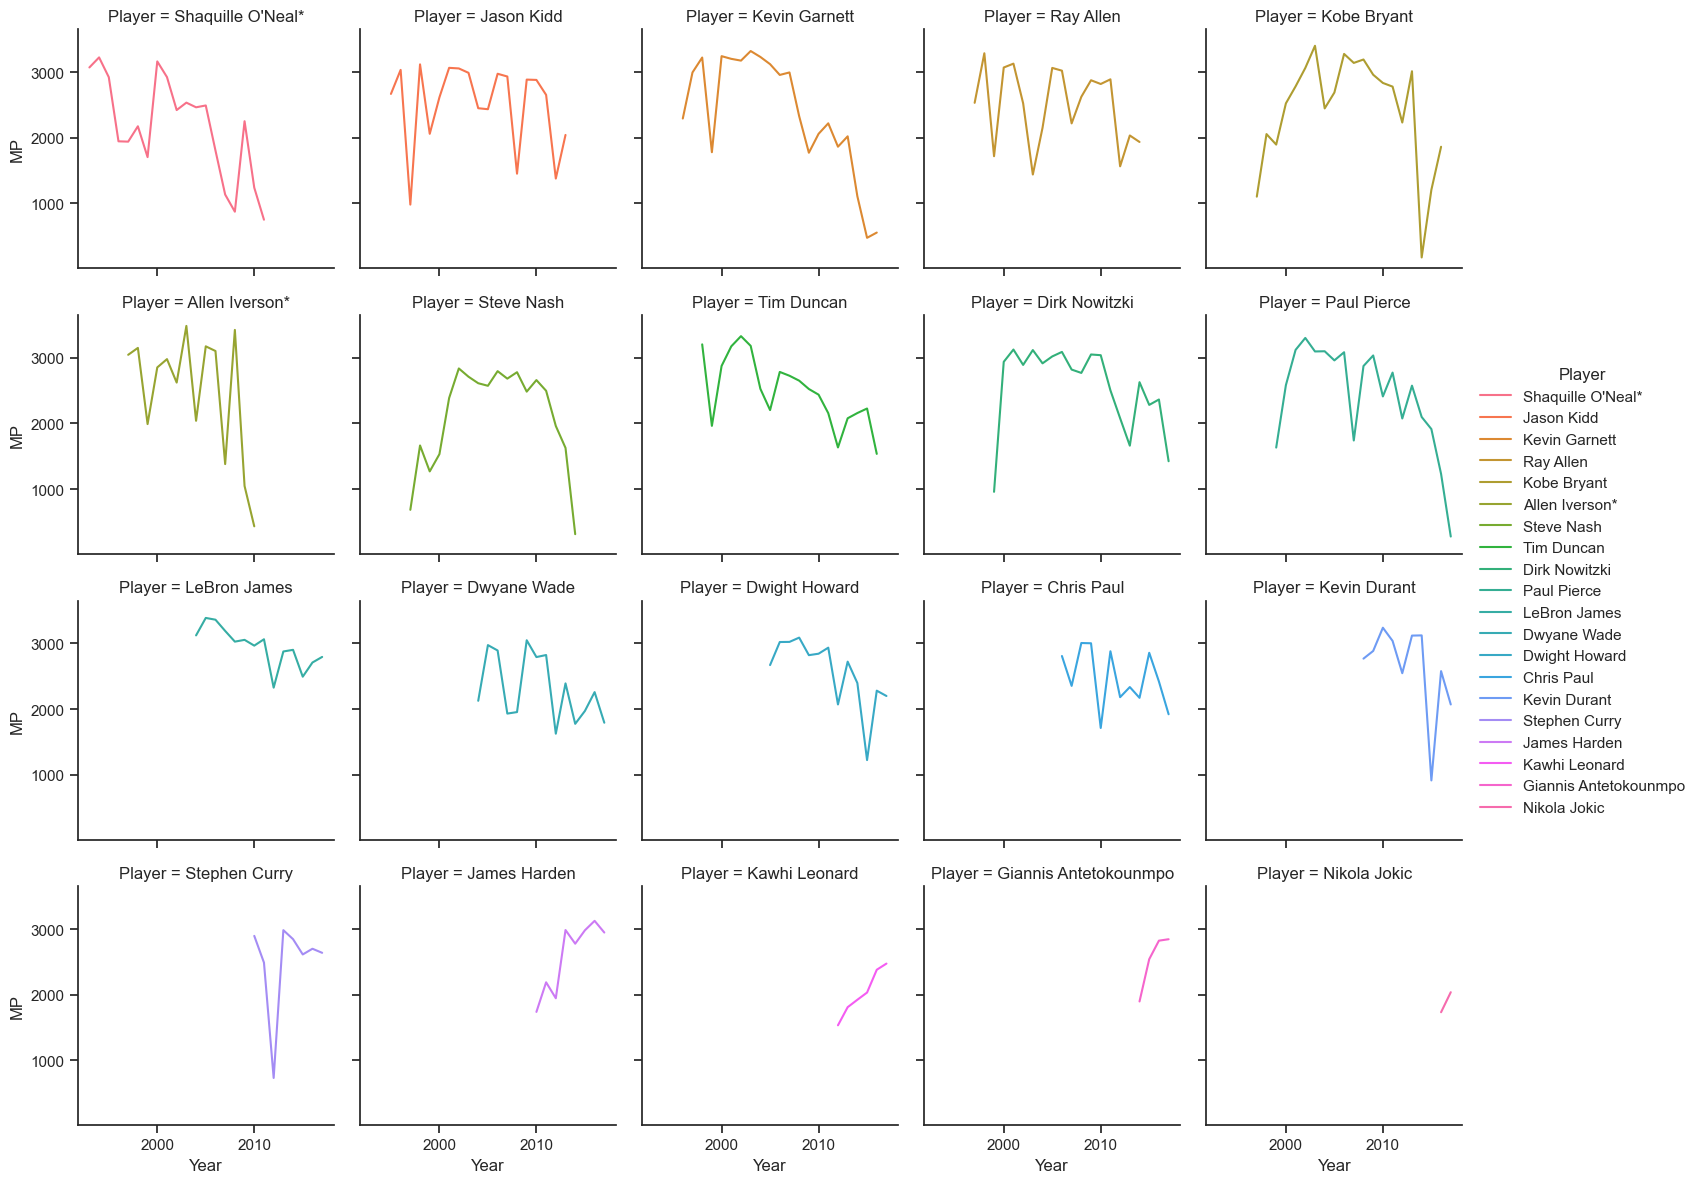

In [47]:
sns.set_theme(style="ticks", rc=custom_params)
sns.relplot(x='Year', y='MP',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None);

Nombre de points par joueur : Nous pouvons voir que Kobe Bryant est le joueur ayant marqué le plus de points dans sa carrière parmi nos joueurs sélectionnés. Nikola Jokic est le joueur ayant le moins marqué de points, environ 2000 points.

In [63]:
fig = px.bar(seasons_stat, x="PTS", y="Player", title = "Total de points par joueur", labels=dict(PTS="Points marqués", Player="Nom des joueurs"))
fig.update_layout(bargap=0.2, title = {"x" : 0.5})
fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                  plot_bgcolor = "rgba(0,0,0,0)")
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Nombre de points par joueur et par année :

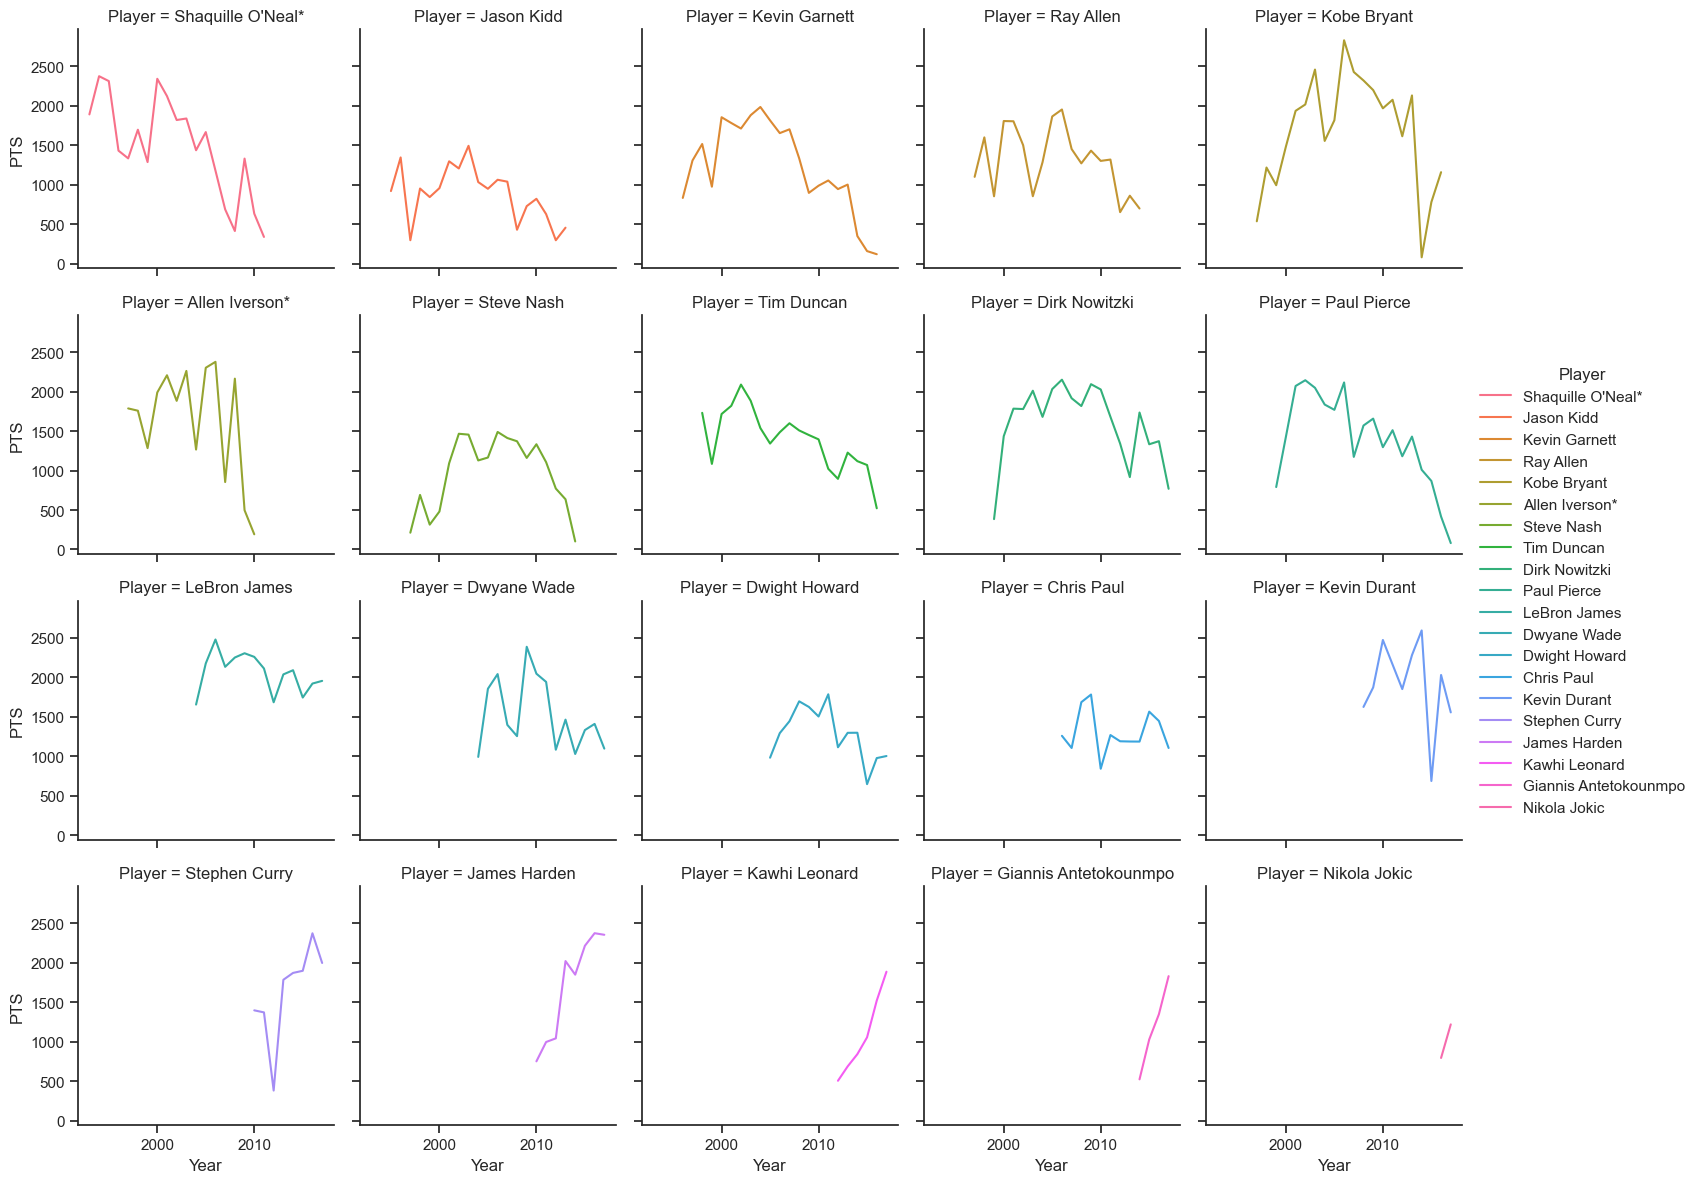

In [51]:
sns.set_theme(style="ticks", rc=custom_params)
sns.relplot(x='Year', y='PTS',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None);

Nombre de points par minutes jouées et par joueur :

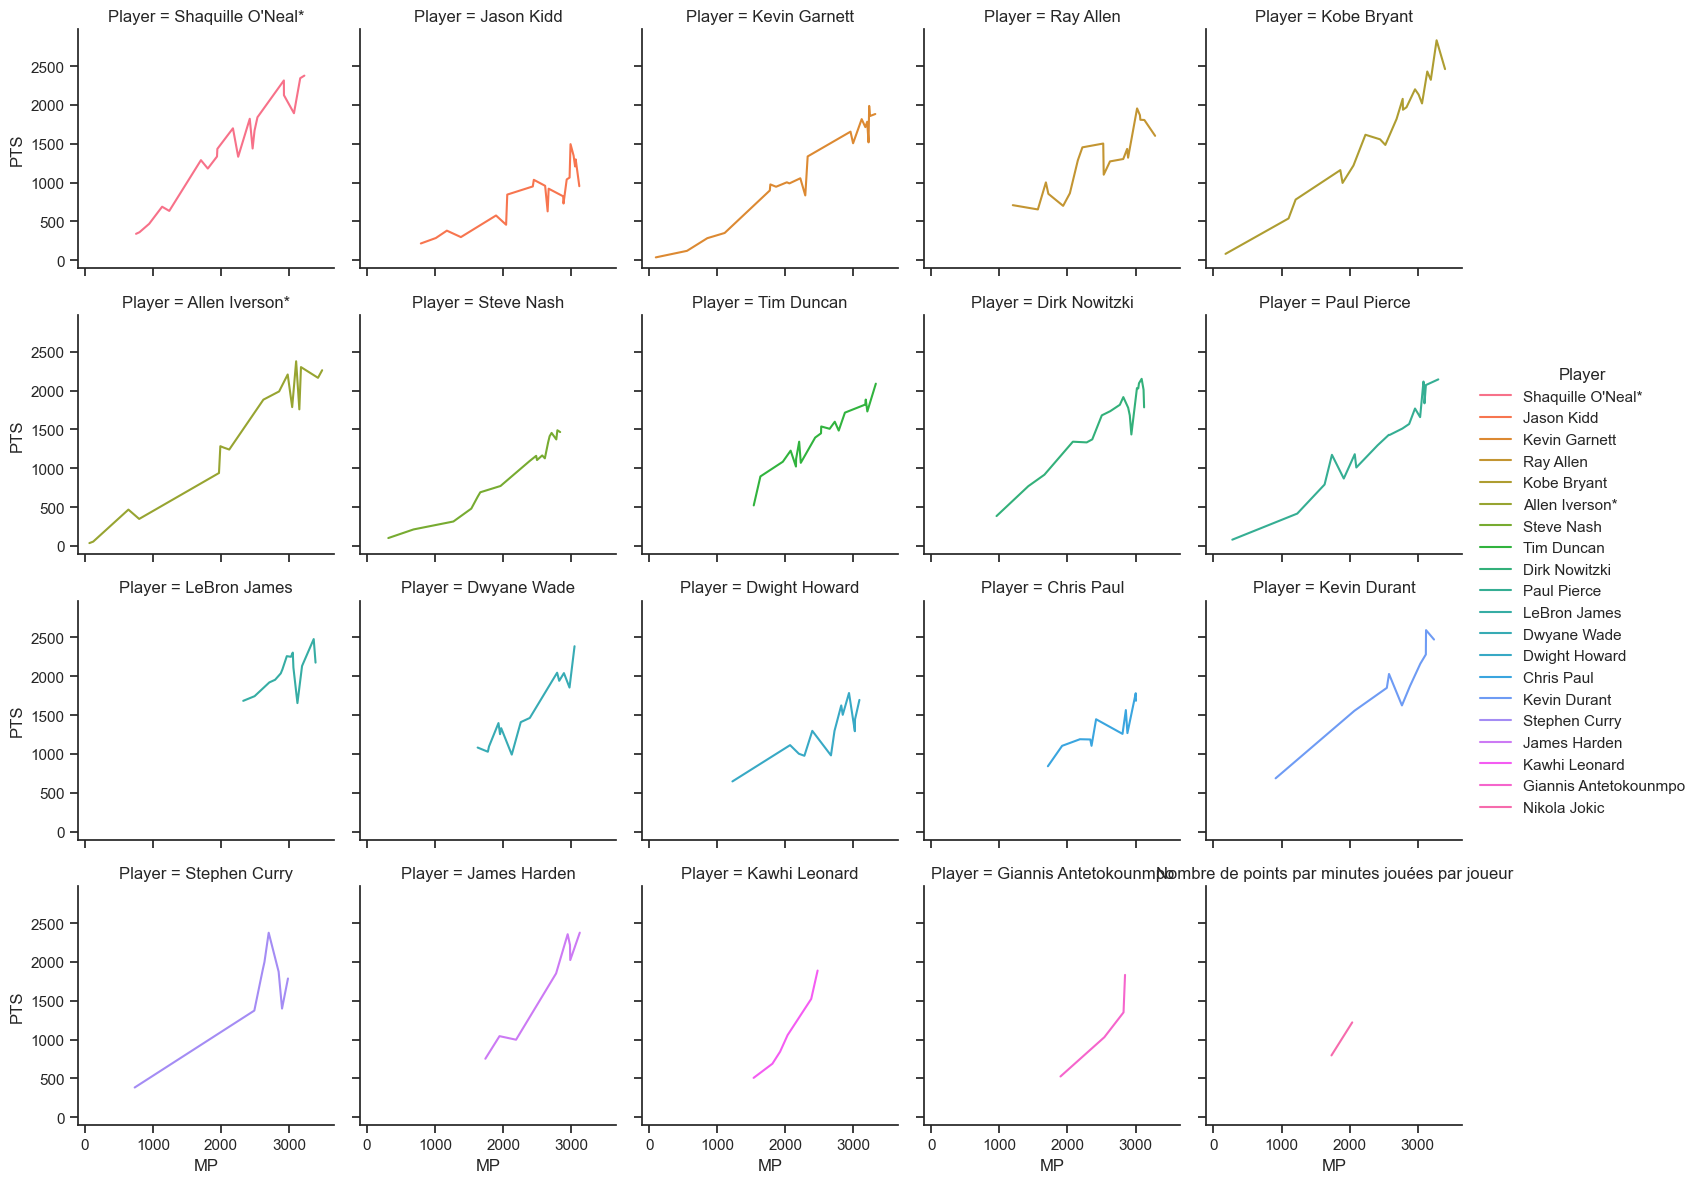

In [52]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.relplot(x='MP', y='PTS',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
plt.title('Nombre de points par minutes jouées par joueur');

Efficacité des tirs par joueur (TS%) :

In [58]:
obs = seasons_stat.groupby('Player').mean().mul(100).sort_values(by='TS%', ascending = True)
fig = px.bar(seasons_stat, x=obs['TS%'], y=obs.index, title = "Efficacité des tirs par joueur", labels=dict(x="True Shooting", y="Nom des joueurs"))
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

Efficacité des tirs par joueur (eFG%) :

In [64]:
obs = seasons_stat.groupby('Player').mean().mul(100).sort_values(by='eFG%', ascending = True)
fig = px.bar(seasons_stat, x=obs['eFG%'], y=obs.index, title = "Efficacité des tirs par joueur", labels=dict(x="Effective Field Goal", y="Nom des joueurs"))
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

Efficacité des tirs en fonction de la position du joueur (TS%) :

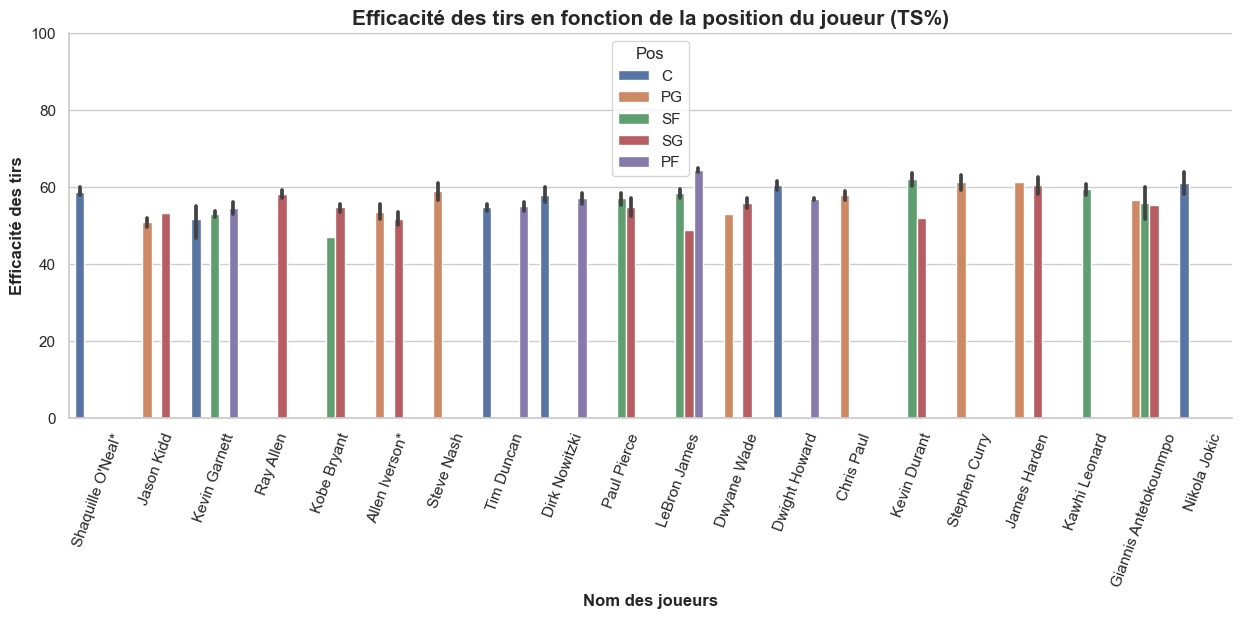

In [74]:
sns.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize = (15,5))
sns.barplot(data=seasons_stat, x="Player", y="TS%", hue = "Pos");
plt.ylim(0,1);
plt.xticks(rotation = 70);
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0,20,40,60,80,100]);
plt.xlabel('Nom des joueurs', fontweight = 'bold');
plt.ylabel('Efficacité des tirs', fontweight = 'bold');
plt.title("Efficacité des tirs en fonction de la position du joueur (TS%)", fontweight = 'bold',fontsize=15);

print("")
plt.show()

Efficacité du tirs en fonction de la position du joueur (eFG%) :

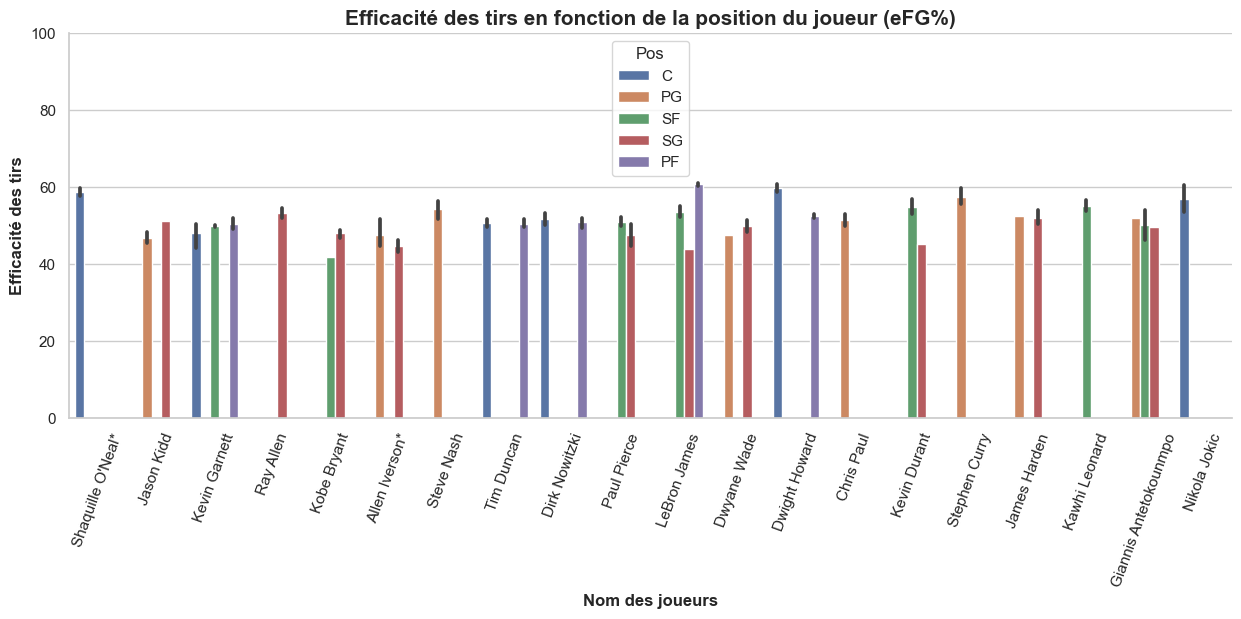

In [75]:
sns.set_theme(style="whitegrid", rc=custom_params)
plt.figure(figsize = (15,5))
sns.barplot(data=seasons_stat, x="Player", y="eFG%", hue = "Pos");
plt.ylim(0,1);
plt.xticks(rotation = 70);
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0,20,40,60,80,100]);
plt.xlabel('Nom des joueurs', fontweight = 'bold');
plt.ylabel('Efficacité des tirs', fontweight = 'bold');
plt.title("Efficacité des tirs en fonction de la position du joueur (eFG%)", fontweight = 'bold',fontsize=15);
print("")
plt.show()

Efficacité des tirs par joueur et par année (TS%) :

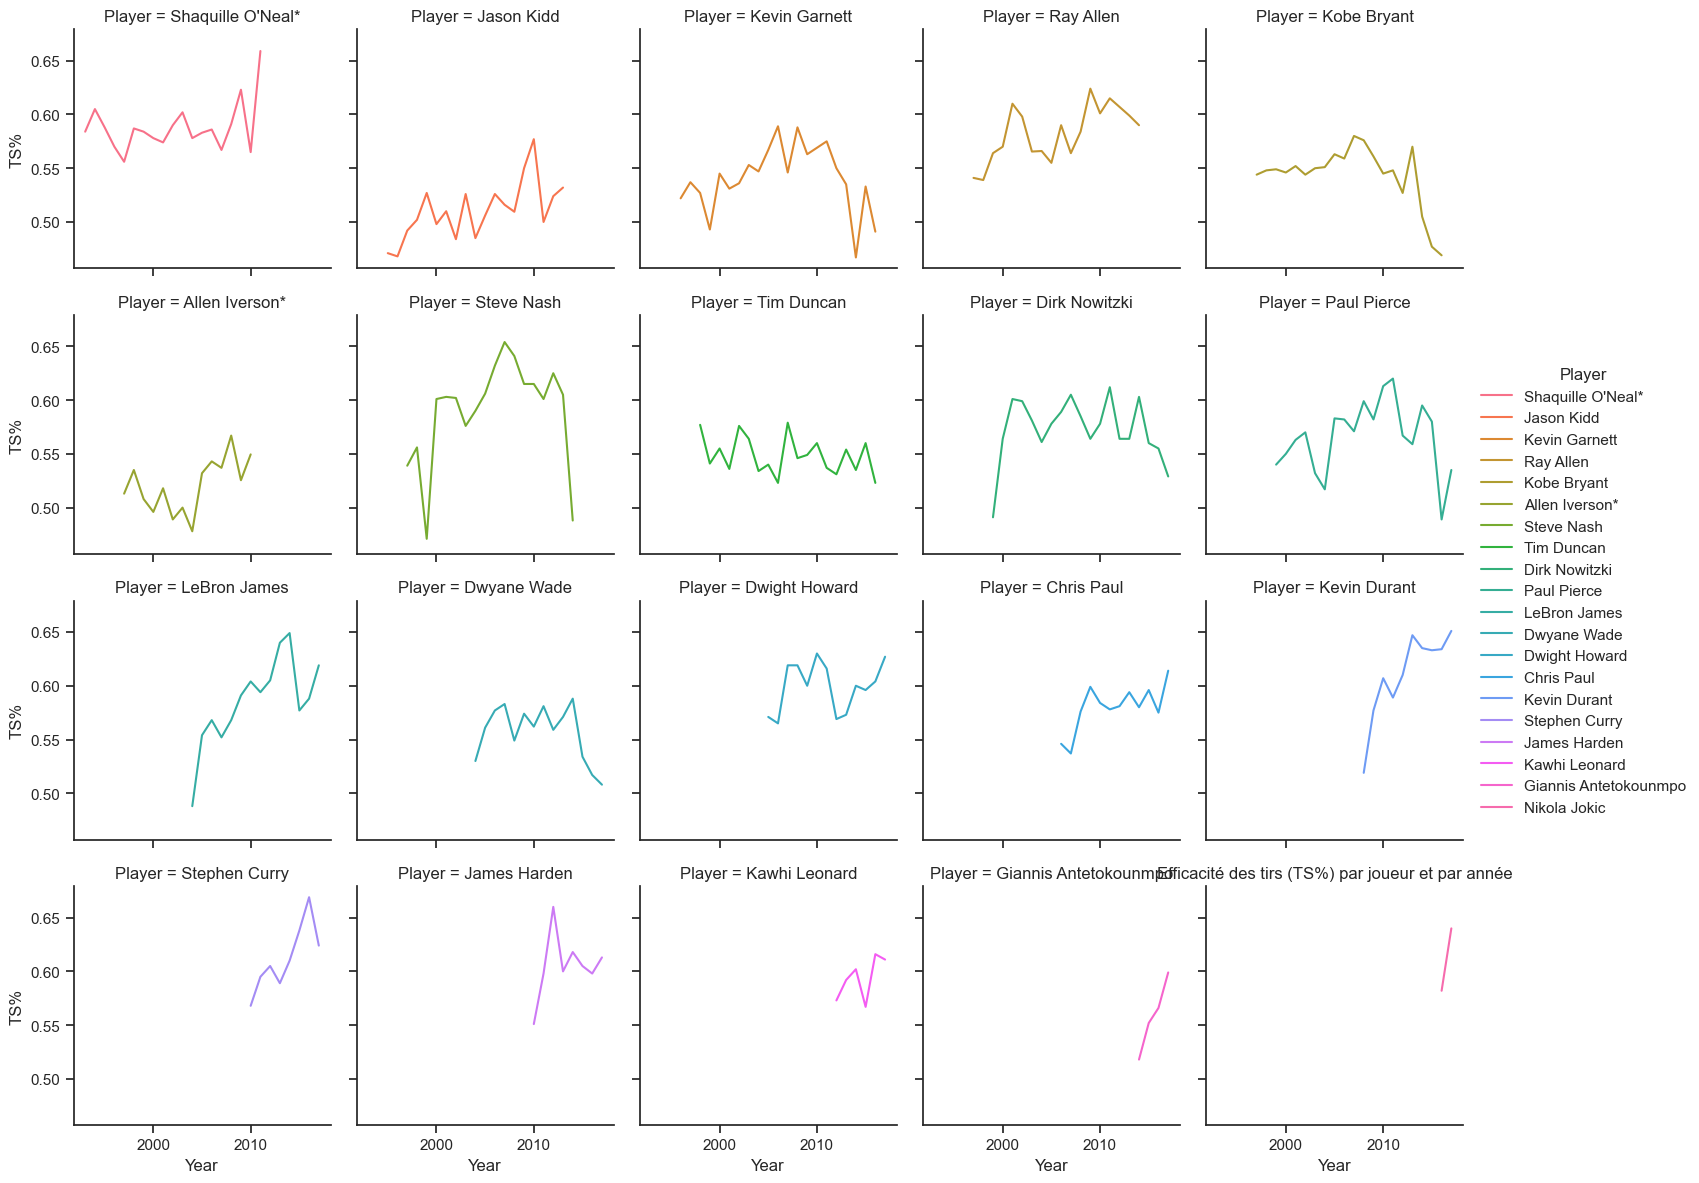

In [77]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.relplot(x='Year', y='TS%',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
plt.title('Efficacité des tirs (TS%) par joueur et par année');

Efficacité des tirs (eFG%) par joueur et par année :

Text(0.5, 1.0, 'Efficacité des tirs (eFG%) par joueur et par année')

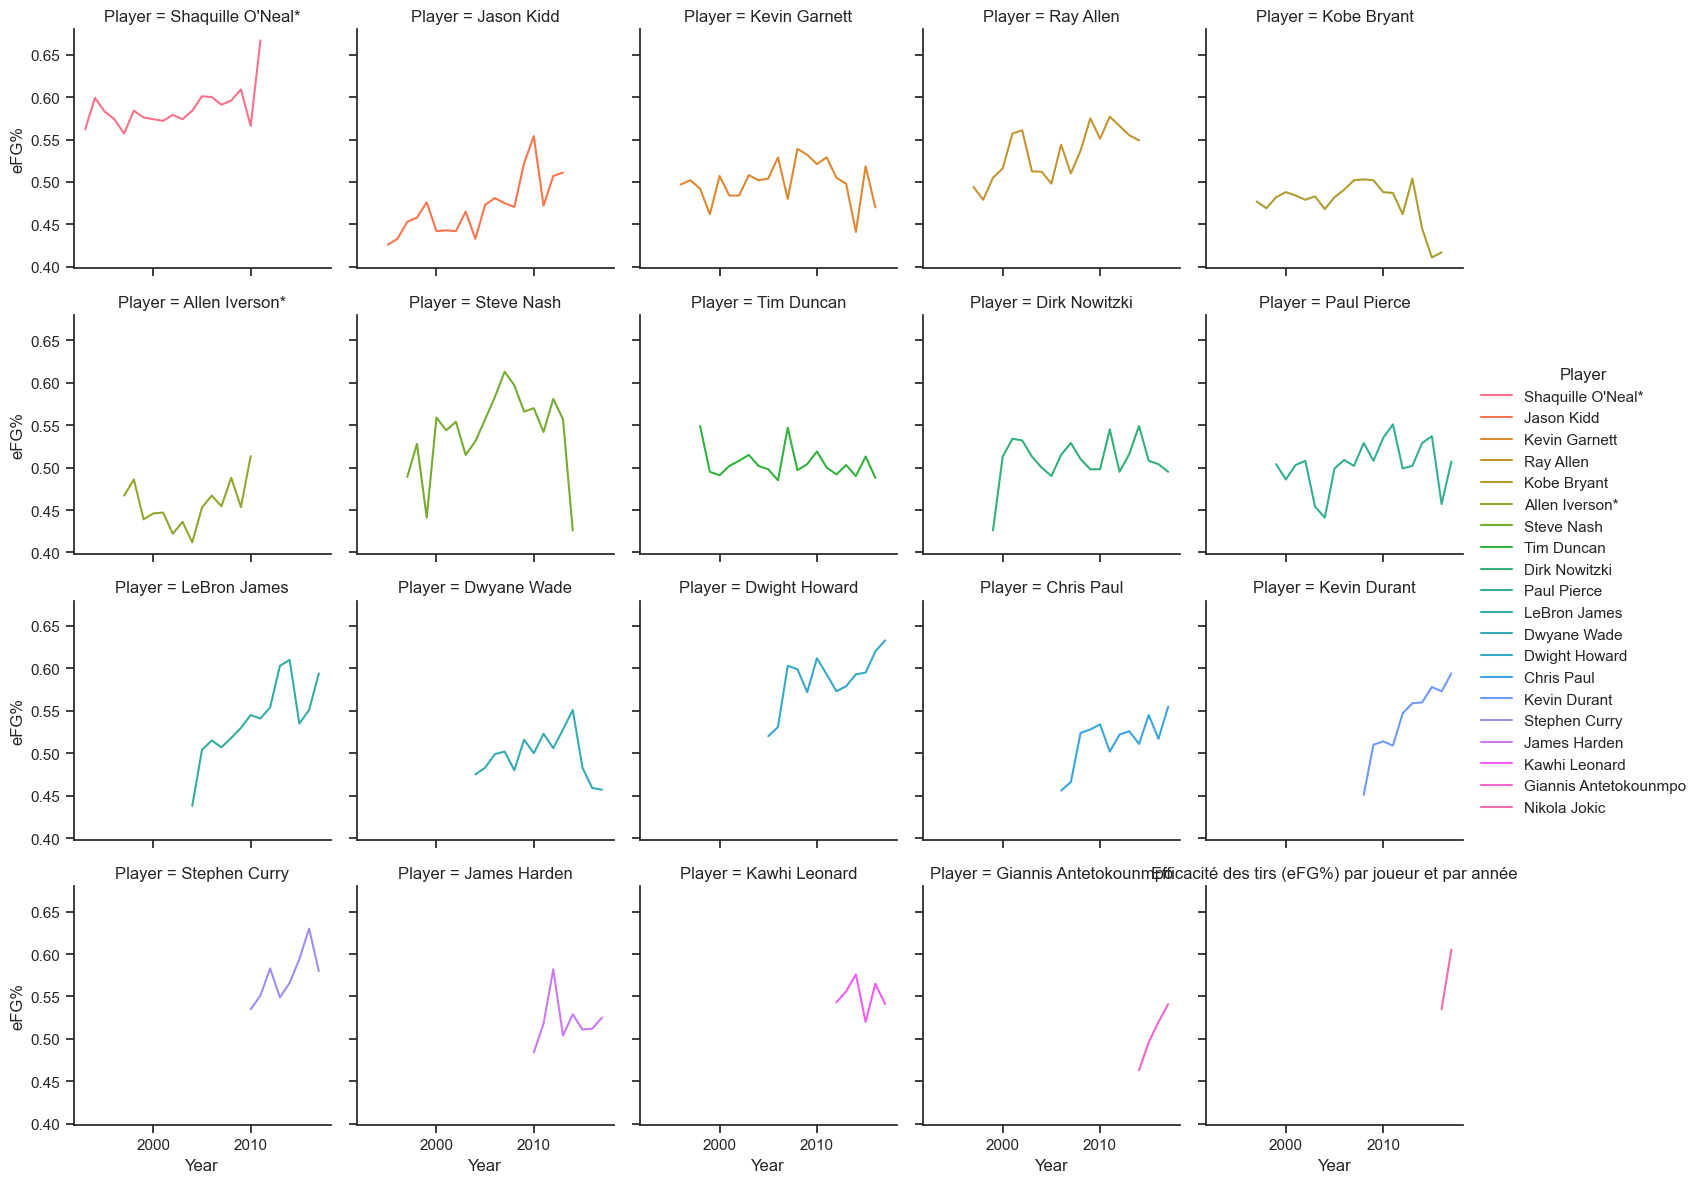

In [78]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.relplot(x='Year', y='eFG%',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
plt.title('Efficacité des tirs (eFG%) par joueur et par année')

Fréquence de tirs à 3 points marqués (3P marqués / Nombre de tentatives de tirs à 3P) par joueur :

In [80]:
obs = seasons_stat.groupby('Player').mean().mul(100).sort_values(by='3P%', ascending = True)
fig = px.bar(seasons_stat, x=obs['3P%'], y=obs.index, title = "Fréquence des tirs à 3 points", labels=dict(x="Ratio de tirs à 3 points", y="Nom des joueurs"))
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

Fréquence de tirs à 2 points marqués (2P marqués / Nombre de tentatives de tirs à 2P) par joueur :

In [81]:
obs = seasons_stat.groupby('Player').mean().mul(100).sort_values(by='2P%', ascending = True)
fig = px.bar(seasons_stat, x=obs['2P%'], y=obs.index, title = "Fréquence des tirs à 2 points", labels=dict(x="Ratio de tirs à 2 points", y="Nom des joueurs"))
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

Fréquence de lancer-francs marqués (lancer-francs marqués / Nombre de tentatives de lancer-francs) par joueur :

In [82]:
obs = seasons_stat.groupby('Player').mean().mul(100).sort_values(by='FT%', ascending = True)
fig = px.bar(seasons_stat, x=obs['FT%'], y=obs.index, title = "Fréquence des lancers-francs", labels=dict(x="Ratio de lancers-francs", y="Nom des joueurs"))
fig.update_yaxes(categoryorder = "total ascending", showline=True, linewidth=2, linecolor='black')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='Lightgrey',showline=True, linewidth=2, linecolor='black')
fig.update_layout(bargap=0.2, title = {"x" : 0.5}, grid_xaxes=list('x'),
                  plot_bgcolor = 'white')
fig.show()

Fréquence de tirs à 2 points marqués par joueur et par année :

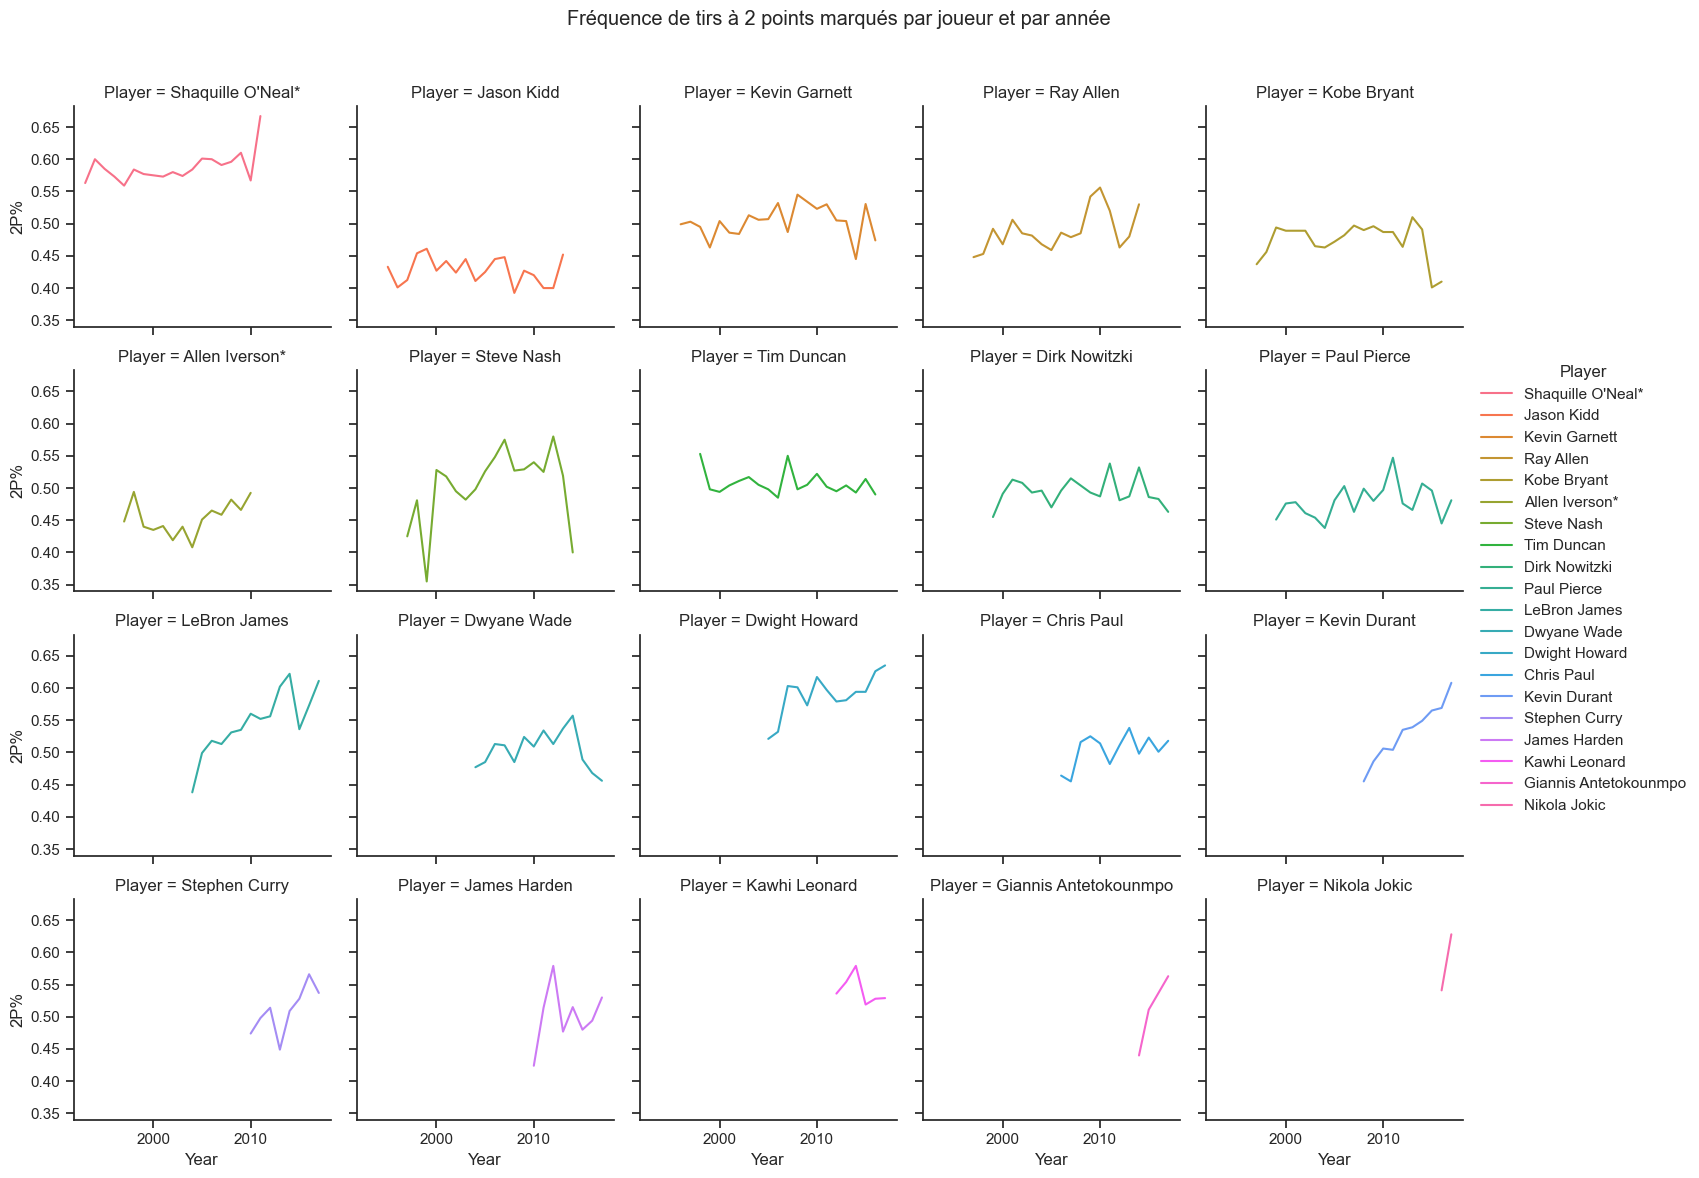

In [85]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
rel=sns.relplot(x='Year', y='2P%',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
rel.fig.subplots_adjust(top=.9)
rel.fig.suptitle('Fréquence de tirs à 2 points marqués par joueur et par année');

Fréquence de tirs à 3 points marqués par joueur et par année :

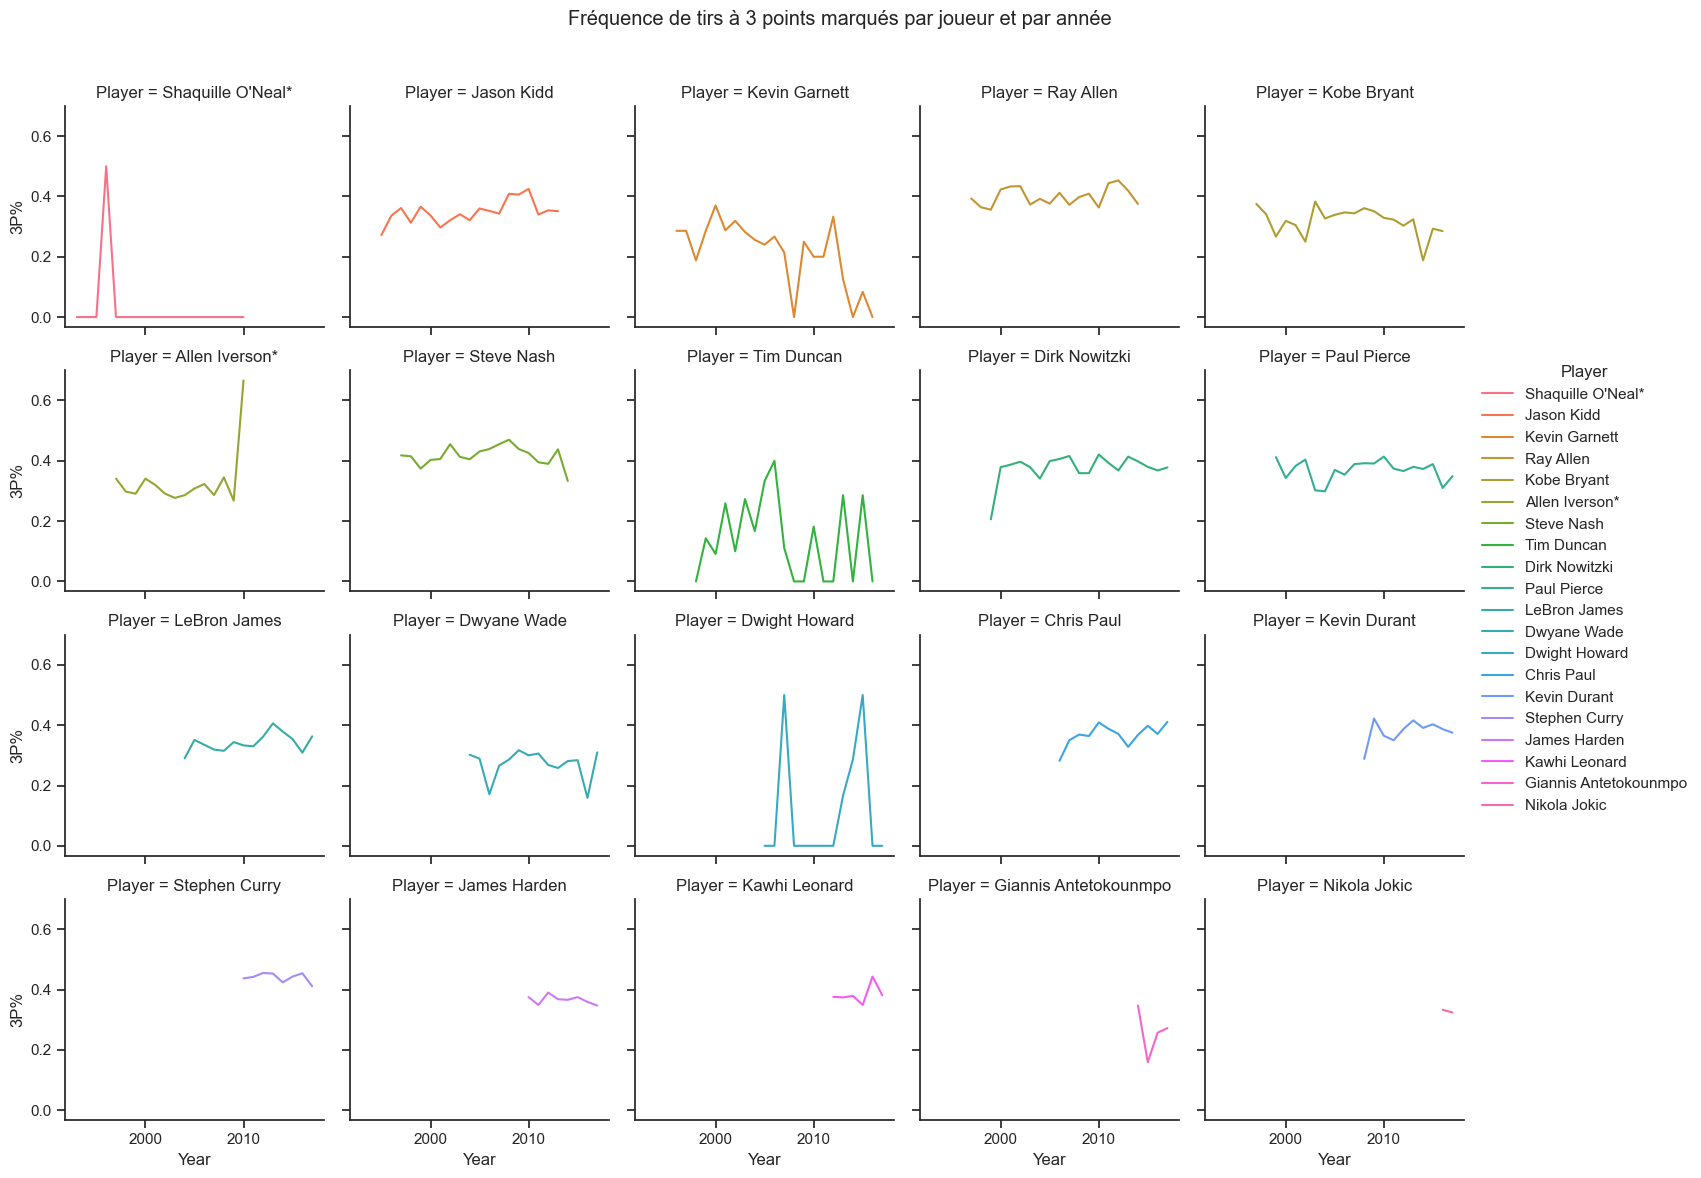

In [86]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
rel=sns.relplot(x='Year', y='3P%',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
rel.fig.subplots_adjust(top=.9)
rel.fig.suptitle('Fréquence de tirs à 3 points marqués par joueur et par année');

Fréquence de lancer-francs marqués par joueur et par année :

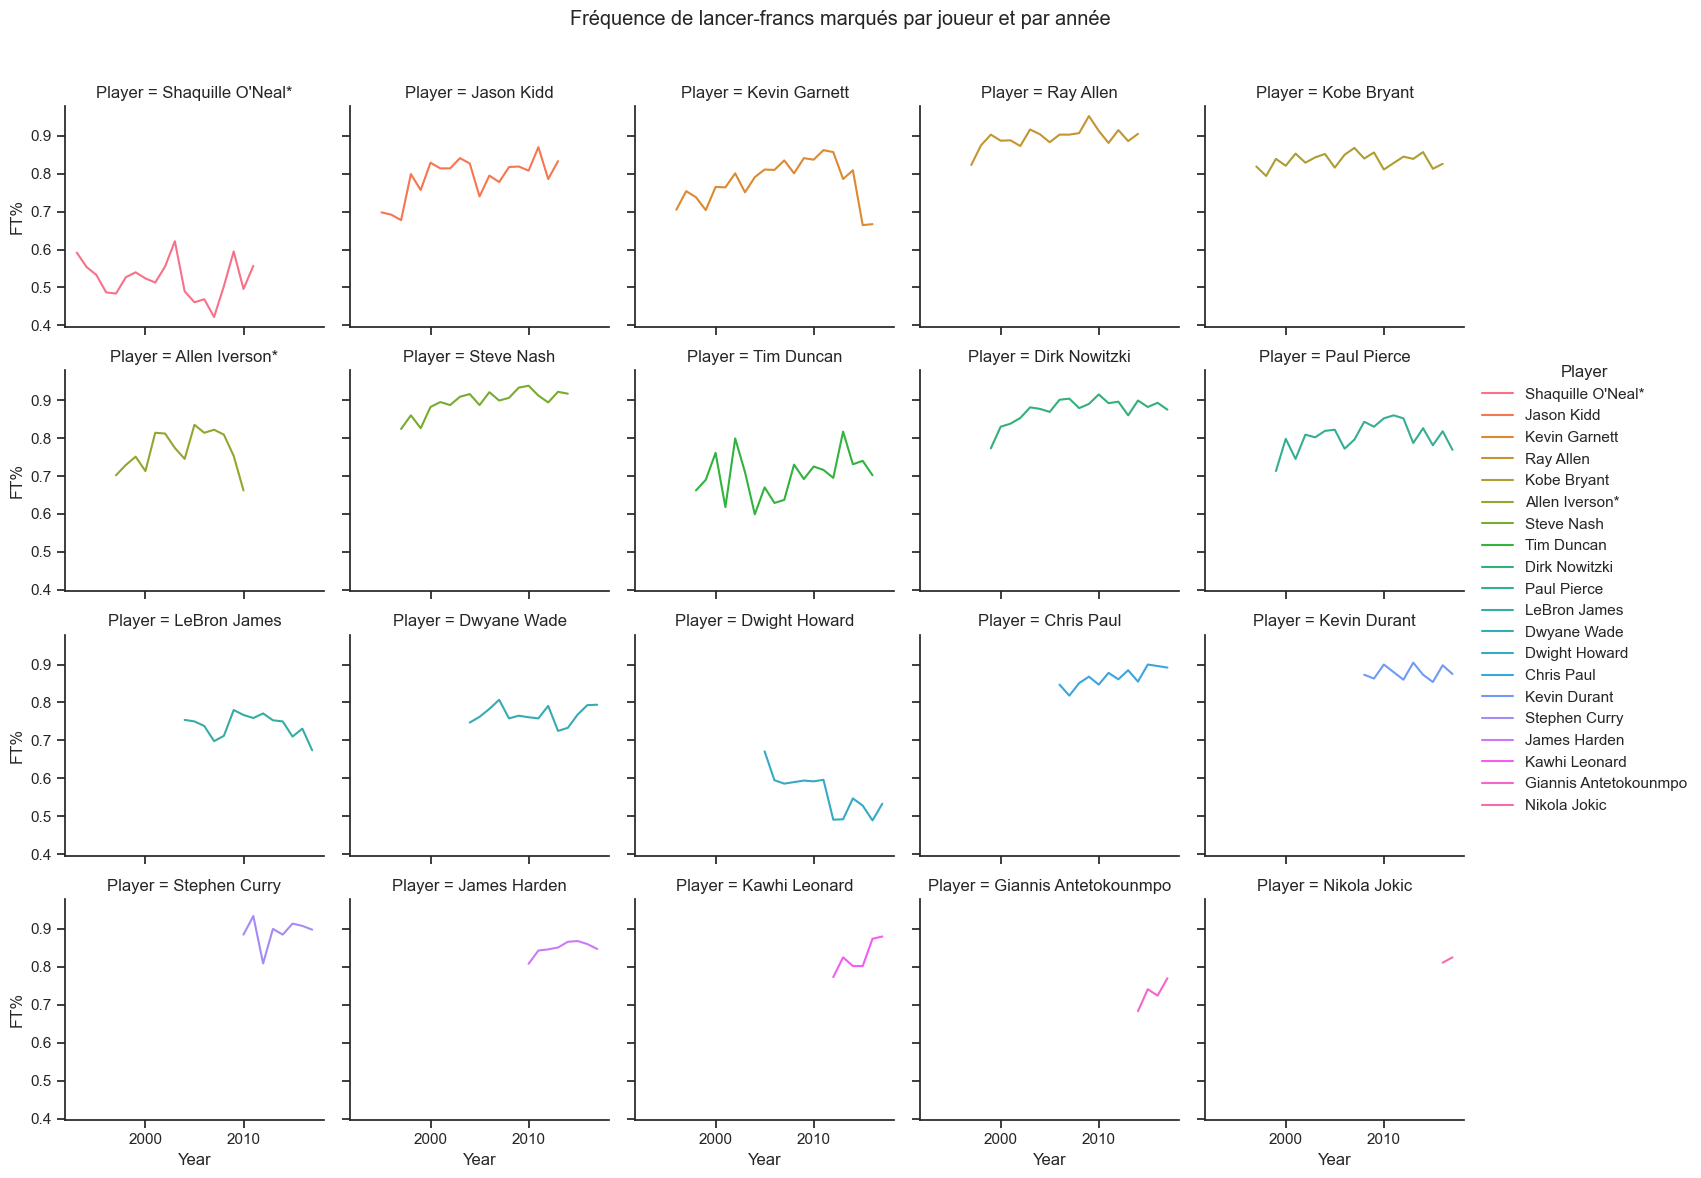

In [87]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
rel = sns.relplot(x='Year', y='FT%',hue='Player',
col='Player', col_wrap=5, height=3,
kind='line',data=seasons_stat, ci=None)
rel.fig.subplots_adjust(top=.9)
rel.fig.suptitle('Fréquence de lancer-francs marqués par joueur et par année');